In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from Gaussian_Process import Gaussian_Process

In [2]:
%matplotlib notebook

In [3]:
def plot(N=40, sigma=1, model=np.sin, noise_std=1):
    real_model_space = np.linspace(0, 50, num=500)
    real_model = model(real_model_space)

    sample_idx = np.random.choice(list(range(500)), N)
    sample_X = real_model_space[sample_idx]
    sample_y = real_model[sample_idx] + np.random.normal(scale=noise_std, size=len(sample_idx))
    
    gp = Gaussian_Process(sample_X, sample_y, sigma=sigma)

    y_hat = np.array([gp.estimate(x) for x in real_model_space])
    y_mean = y_hat[:, 0]
    y_std = y_hat[:, 1]
    plt.figure()
    plt.plot(real_model_space, real_model, label="real model", color="g")
    plt.scatter(sample_X, sample_y, label="samples with noise", color="g")
    plt.plot(real_model_space, y_mean, label="mean estimates", color="b")
    plt.fill_between(real_model_space, y_mean - y_std, y_mean + y_std, label="variance estimates", color="b", alpha=0.1)
    plt.fill_between(real_model_space, y_mean, real_model, label="error", color="r", alpha=0.3)
    plt.title(f"{N} samples")
    plt.legend()
    plt.show()

In [4]:
def model(x):
    return (np.cos(x ** (4/5) ) * np.sin(np.sqrt(x)) * 5 + np.sin(x ** 1.2))

## First lets draw samples from the model without noise

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


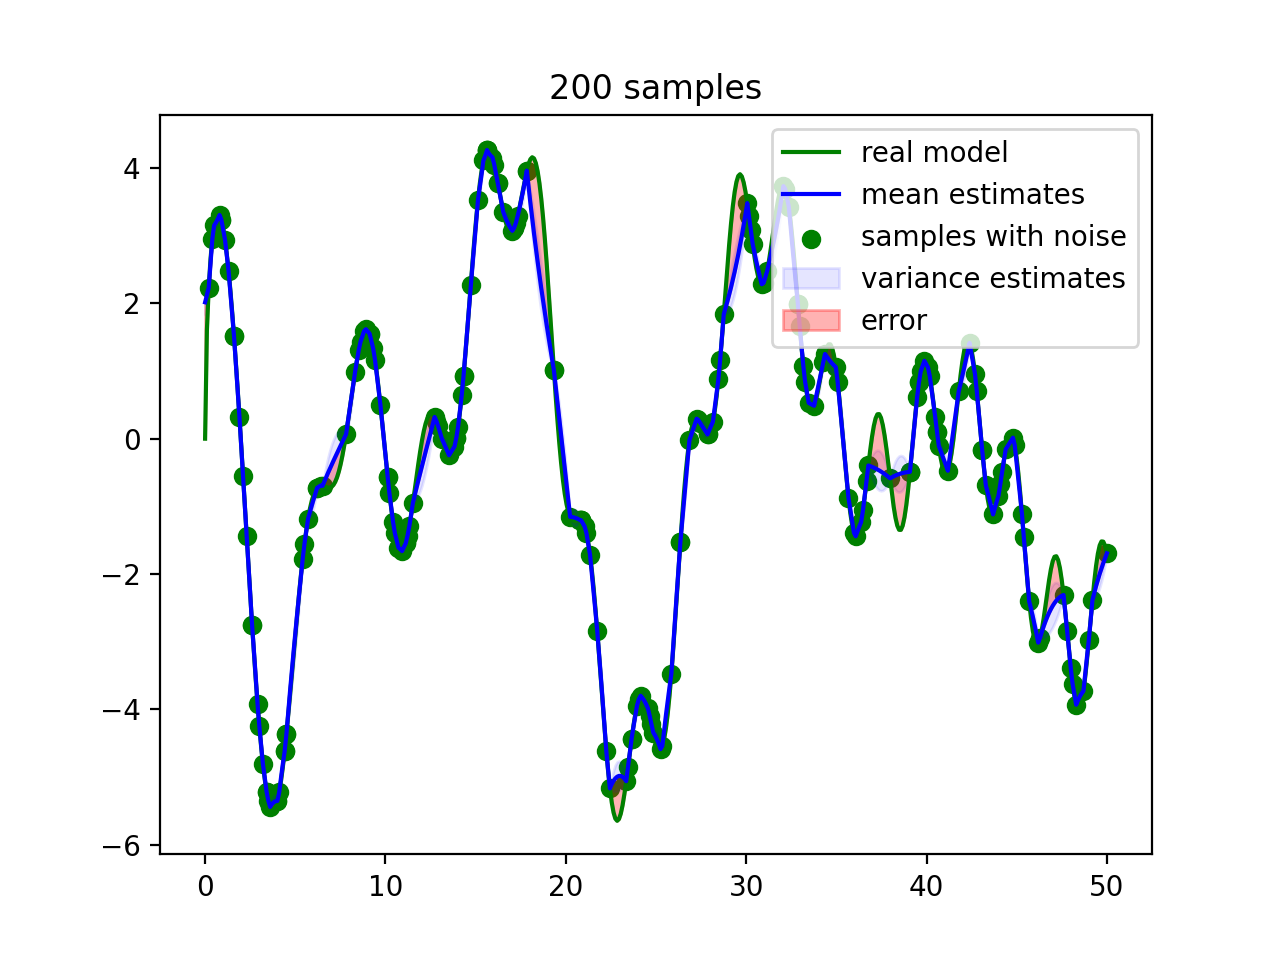

<IPython.core.display.Javascript object>

In [5]:
for n in [50, 200, 400]:
    plot(N=n, sigma=1e-6, model=model, noise_std=0)

## Now let's add gaussian noise with mean of 0 and variance of 1

<IPython.core.display.Javascript object>


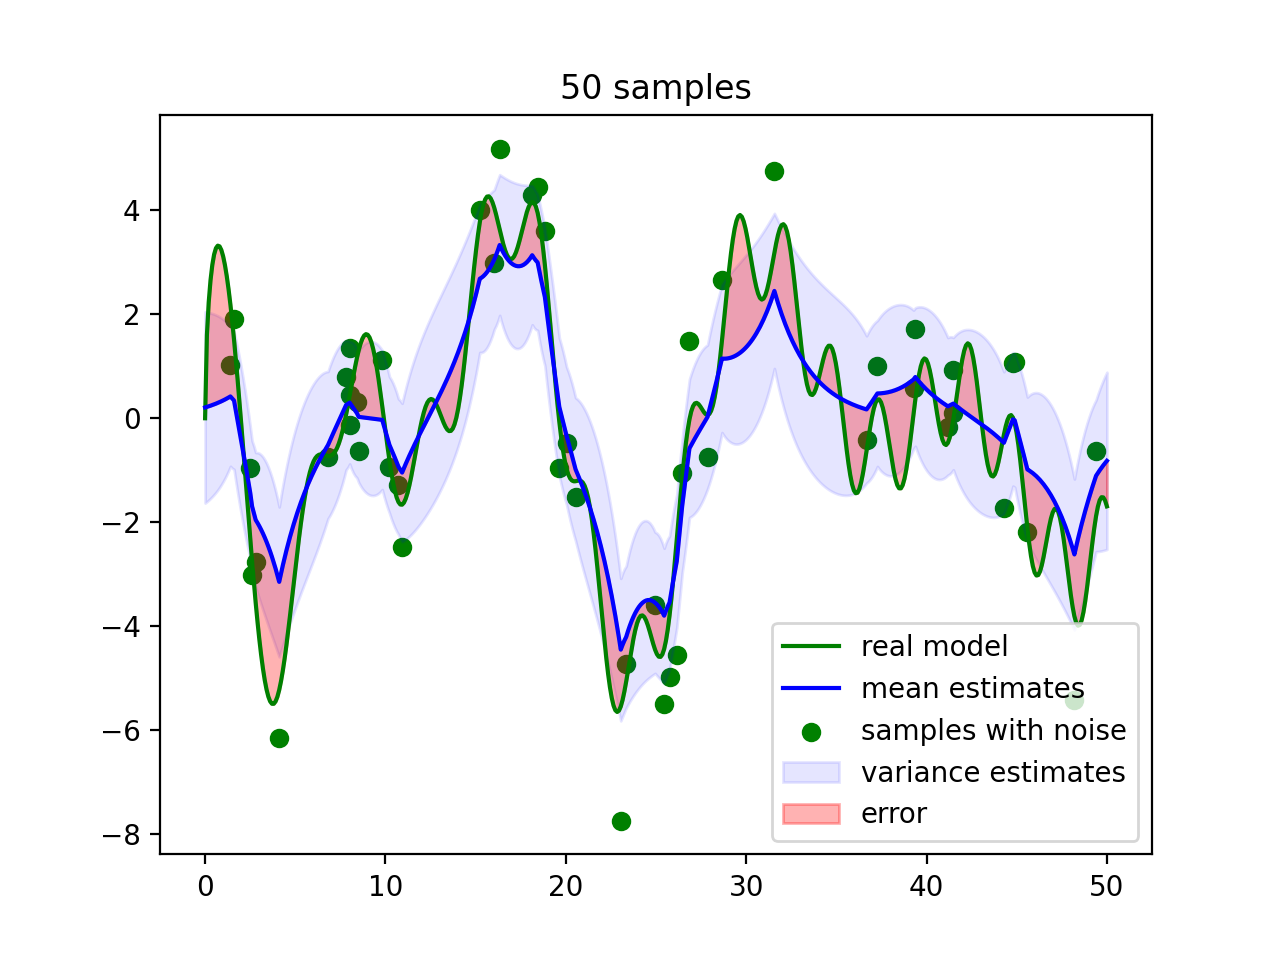

<IPython.core.display.Javascript object>


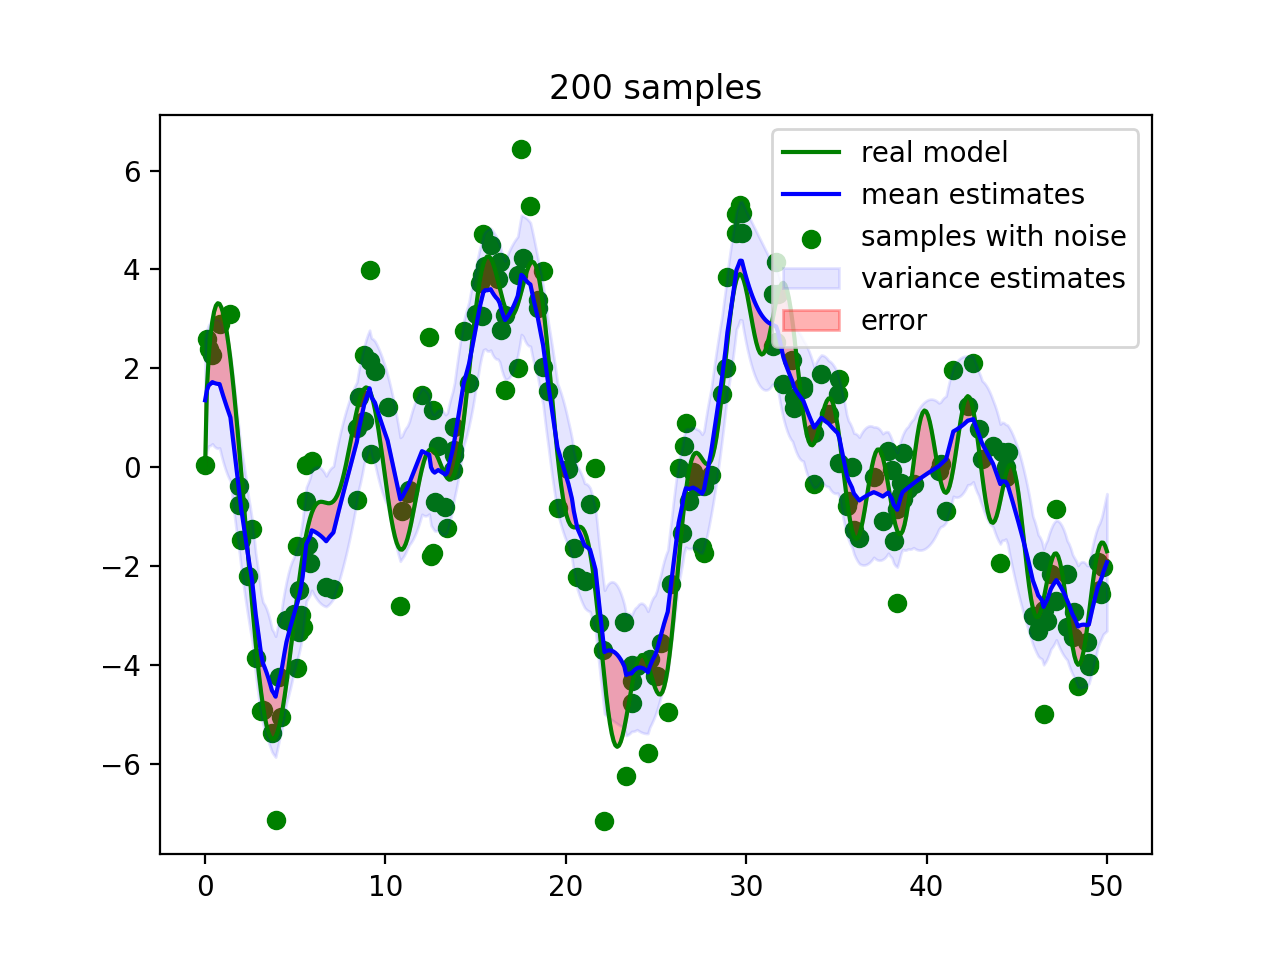

<IPython.core.display.Javascript object>

In [6]:
for n in [50, 200, 400]:
    plot(N=n, sigma=1, model=model)

## 2d is cool but higher dimensions are better

In [7]:
def radial_sin_model_3d(X, Y):
    R = np.sqrt(X ** 2 + Y ** 2)
    return np.sin(R)

In [8]:
def plot_3d(N_train=40, N_test=40, sigma=0, model=radial_sin_model_3d, mesh_step_size=1, noise_std=0):
    """ takes a bivariat normal distribution as model and plots mean of gaussian process estimation in 3d """
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    lower = -7
    upper = 7
    X = np.arange(lower, upper, mesh_step_size)
    Y = np.arange(lower, upper, mesh_step_size)
    X, Y = np.meshgrid(X, Y)
    Z = model(X, Y)
    
    surf = ax.plot_surface(X, Y, Z, label="real model", alpha=0.25)
    
    X_train_all = np.vstack((X.flatten(), Y.flatten())).T
    sample_idx = np.random.choice(np.arange(X_train_all.shape[0]), N_train)
    X_train = X_train_all[sample_idx]
    y_train = Z.flatten()[sample_idx] + np.random.normal(scale=noise_std, size=len(sample_idx))
    
    X_test = np.random.uniform(lower, upper, (N_test, 2))
    
    gp = Gaussian_Process(X_train, y_train, sigma=sigma)
    y_hat = np.array([gp.estimate(x) for x in X_test]) 
    y_mean = y_hat[:,0]
    y_var = y_hat[:,1]
    y = model(X_test[:,0], X_test[:,1])
    mse = 1 / y.shape[0] * np.linalg.norm(y_mean - y)
    
    ax.scatter(X_train[:,0], X_train[:,1], y_train, color="green", label="samples", alpha=0.1)
    
    done = False
    for x_1, x_2, y_mean_i, y_var_i in zip(X_test[:,0], X_test[:,1], y_mean, y_var):
        ax.plot([x_1, x_1], [x_2, x_2], [y_mean_i - y_var_i/2, y_mean_i + y_var_i/2], label= None if done else "variance estimate", color="orange")
        done = True
        
    ax.scatter(X_test[:,0], X_test[:,1], y_mean, color="orange", label="mean estimate")
    surf._facecolors2d=surf._facecolor3d 
    surf._edgecolors2d=surf._edgecolor3d
    ax.legend()
    ax.set_title(f"trained on {N_train}, tested on {N_test} samples, MSE = {mse:.4f}, mean estimated variance = {y_var.mean():.4f}, noise std = {noise_std}")

## Samples from the model without noise

<IPython.core.display.Javascript object>


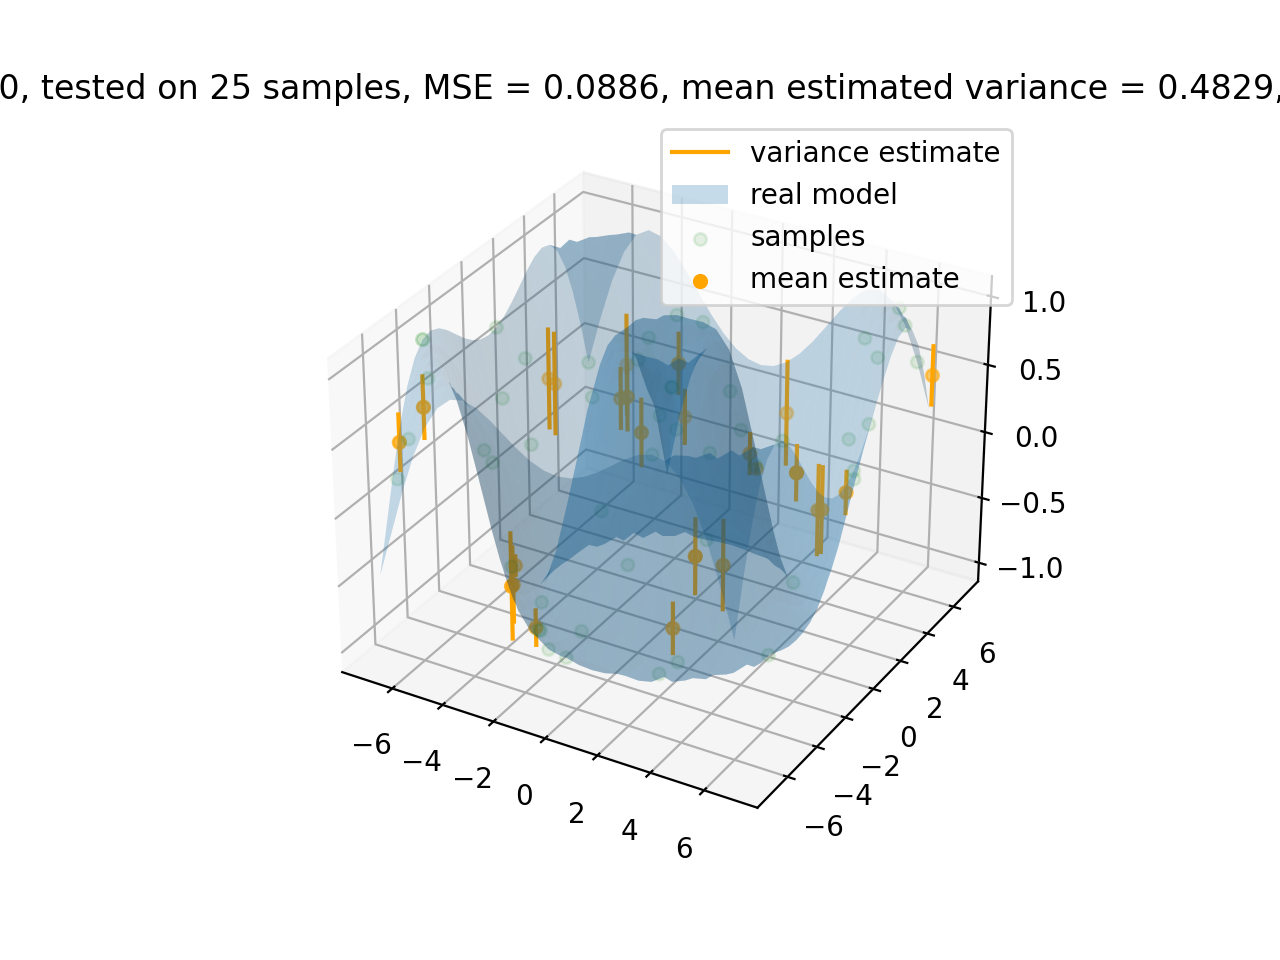

<IPython.core.display.Javascript object>


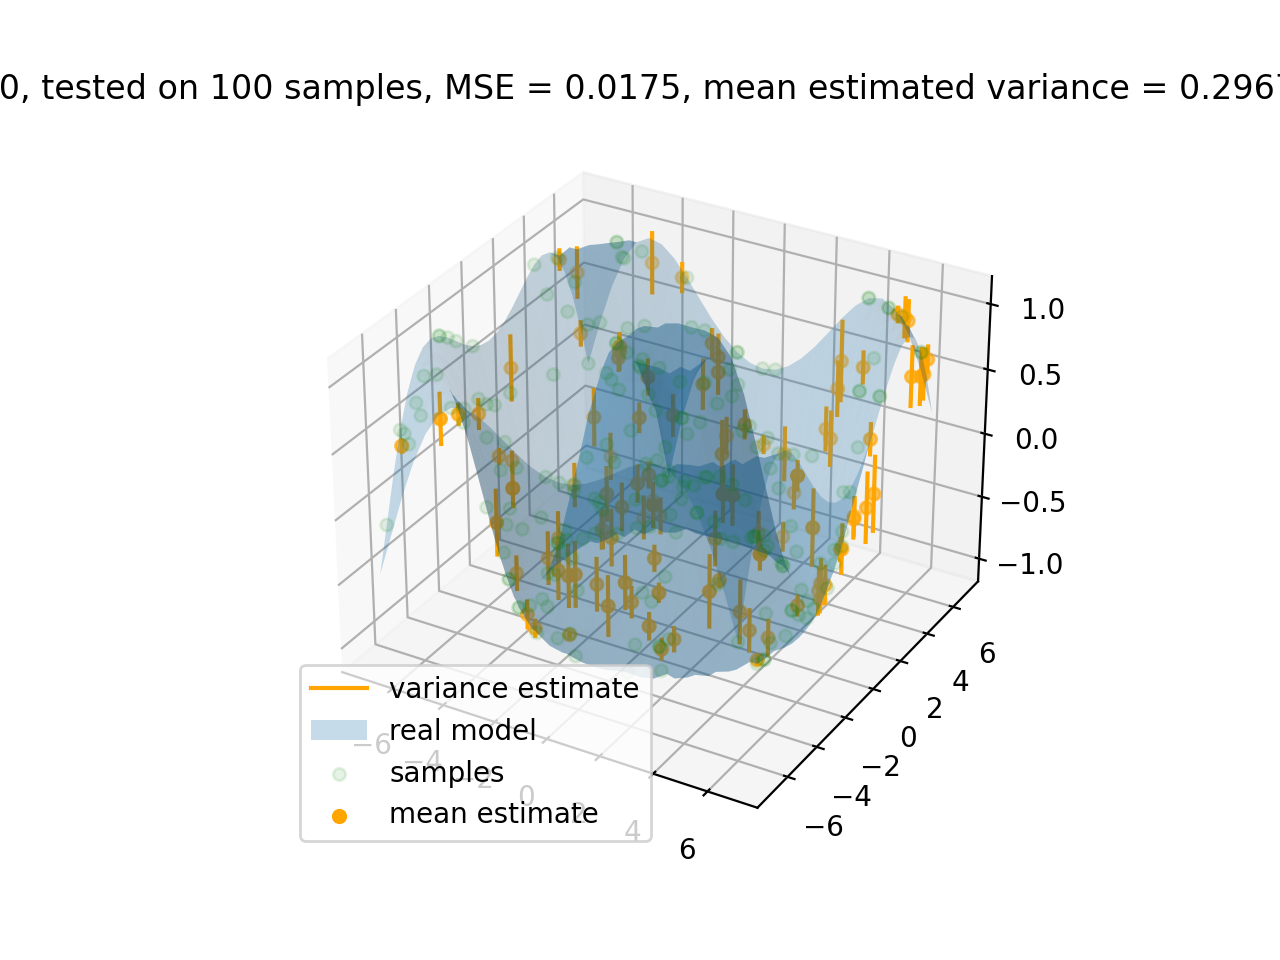

<IPython.core.display.Javascript object>


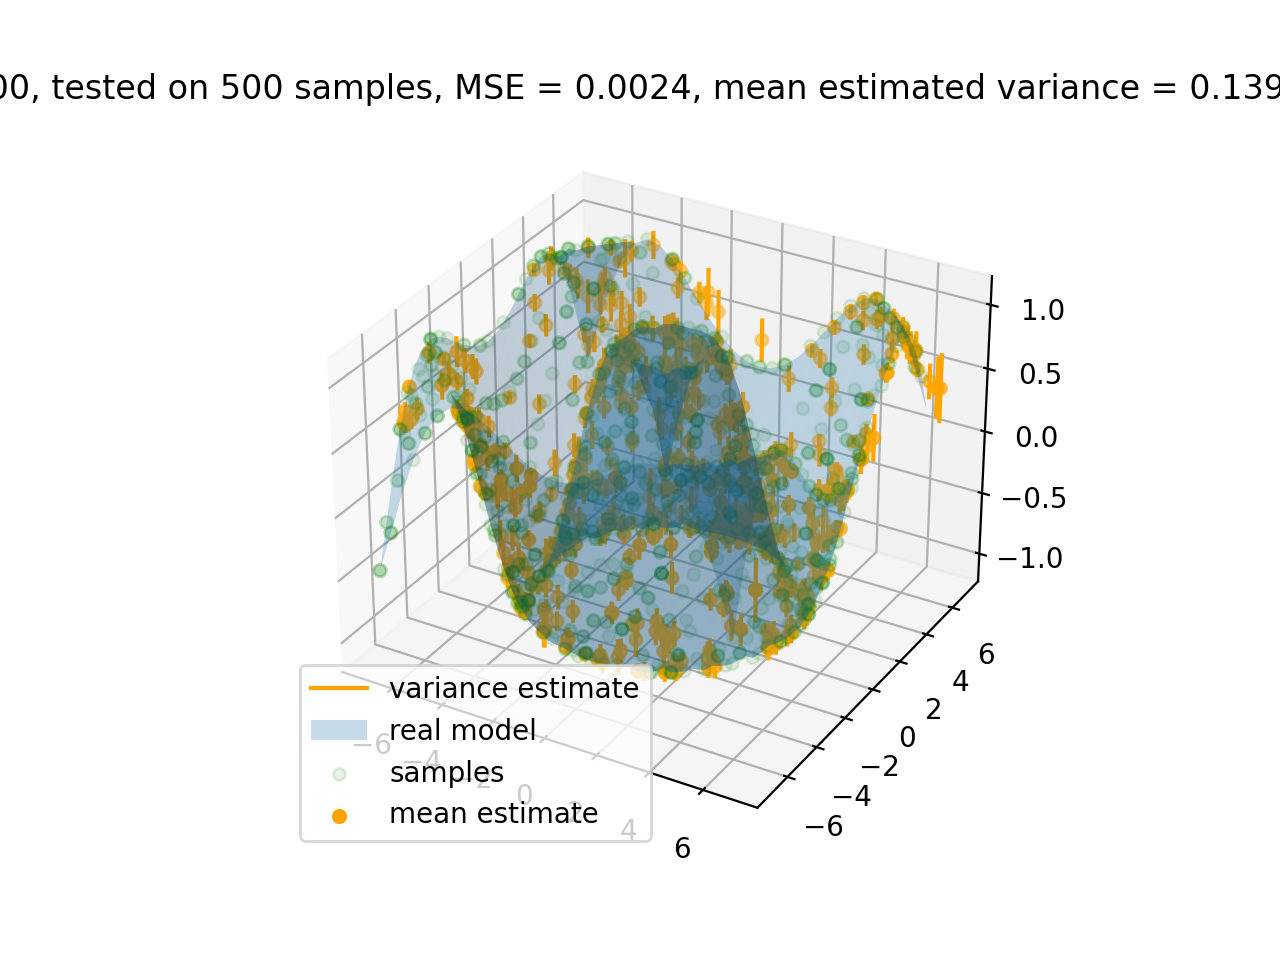

In [9]:
for n in [50, 200, 1000]:
    plot_3d(N_train=n, N_test=n//2, mesh_step_size=0.5)

## Now add gaussian noise with mean of 0 and variance of 1

<IPython.core.display.Javascript object>


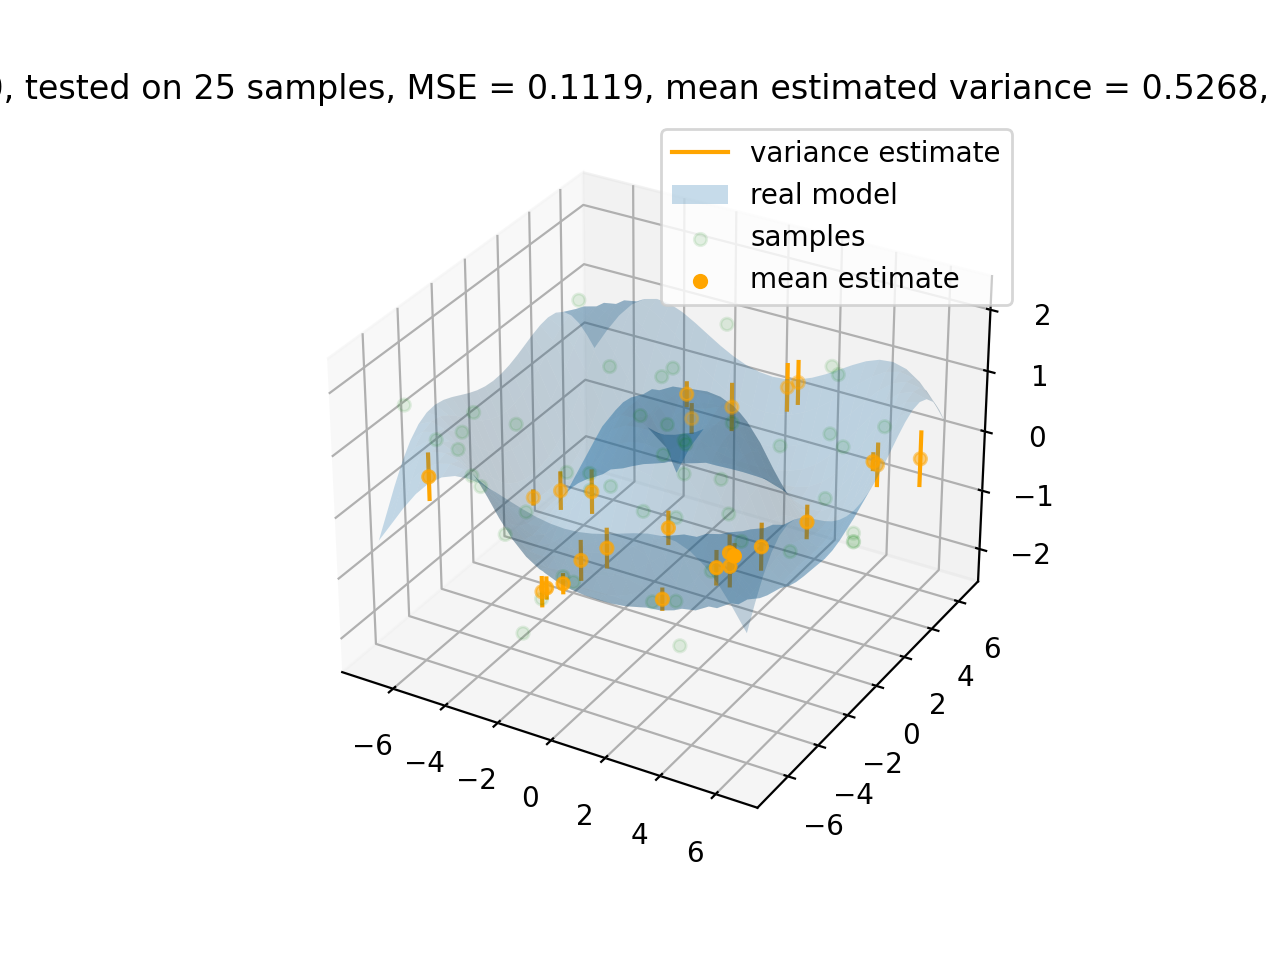

<IPython.core.display.Javascript object>


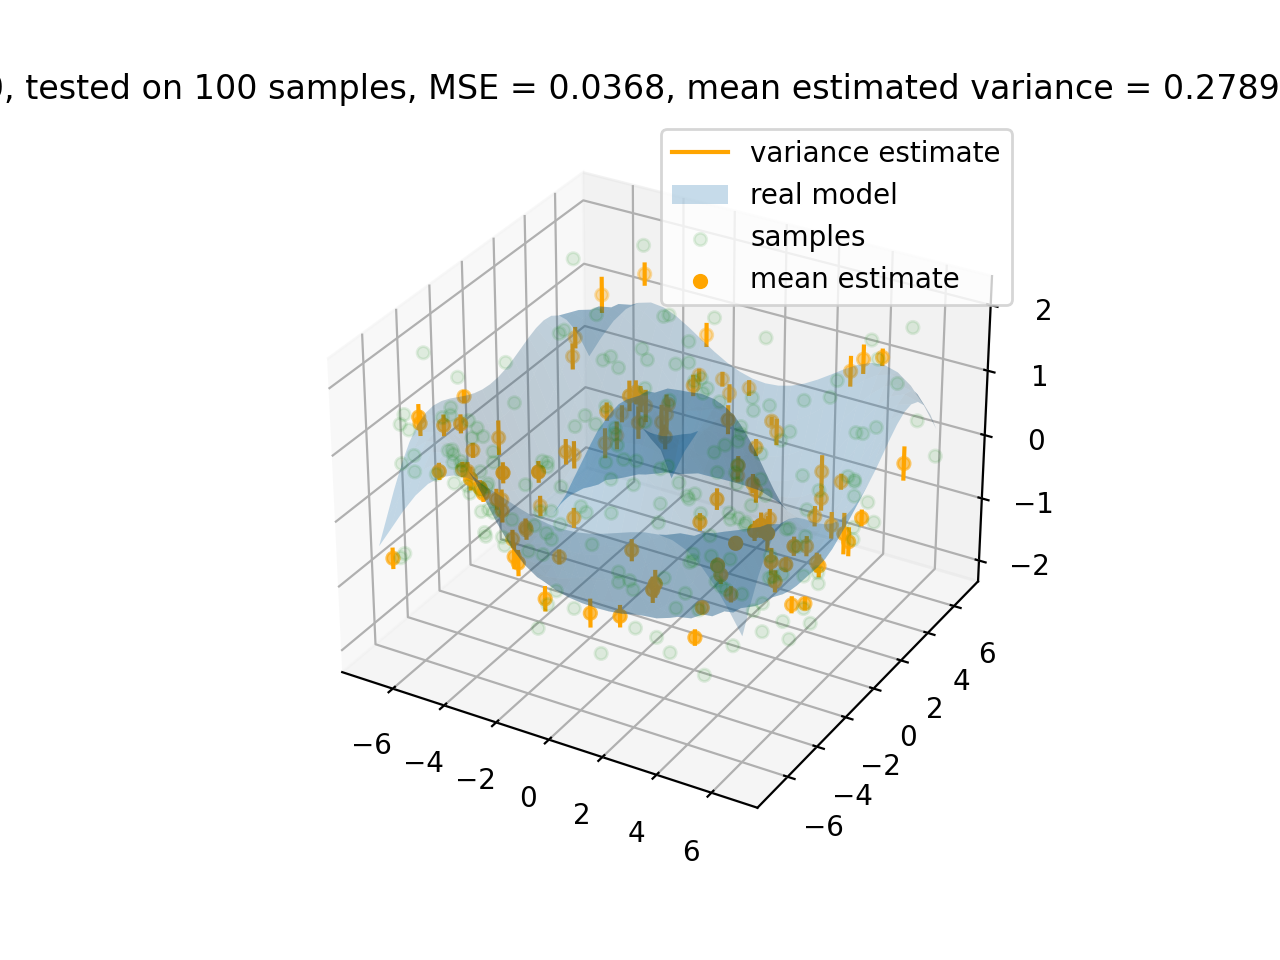

<IPython.core.display.Javascript object>


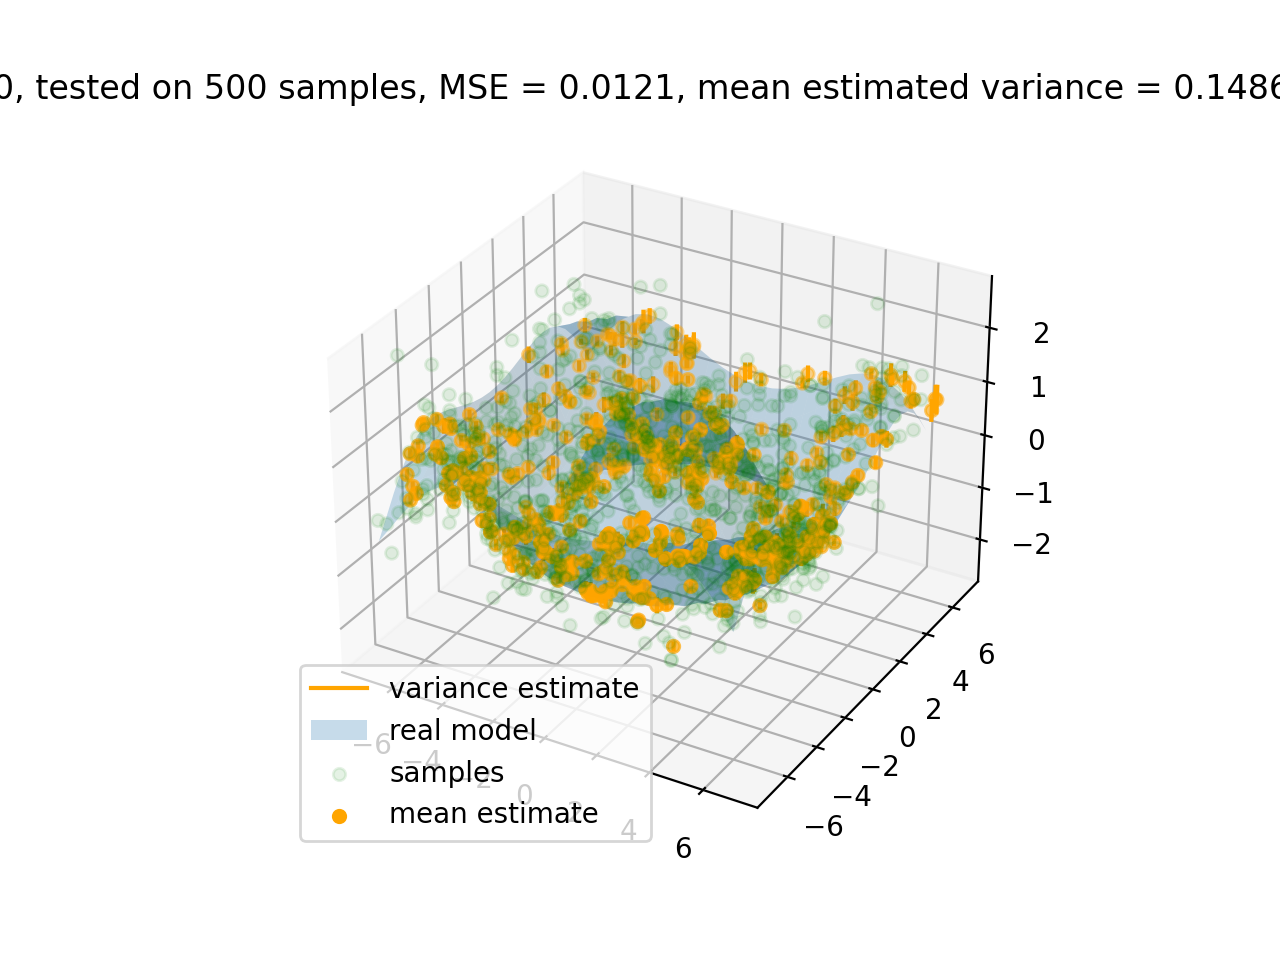

In [10]:
for n in [50, 200, 1000]:
    plot_3d(N_train=n, N_test=n//2, mesh_step_size=0.5, noise_std=0.5)